In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('corn_grain.csv')
df_viz = df.groupby(by=["YEAR"])[["YIELD", "AREA", "TOTAL_YIELD"]].sum().reset_index()

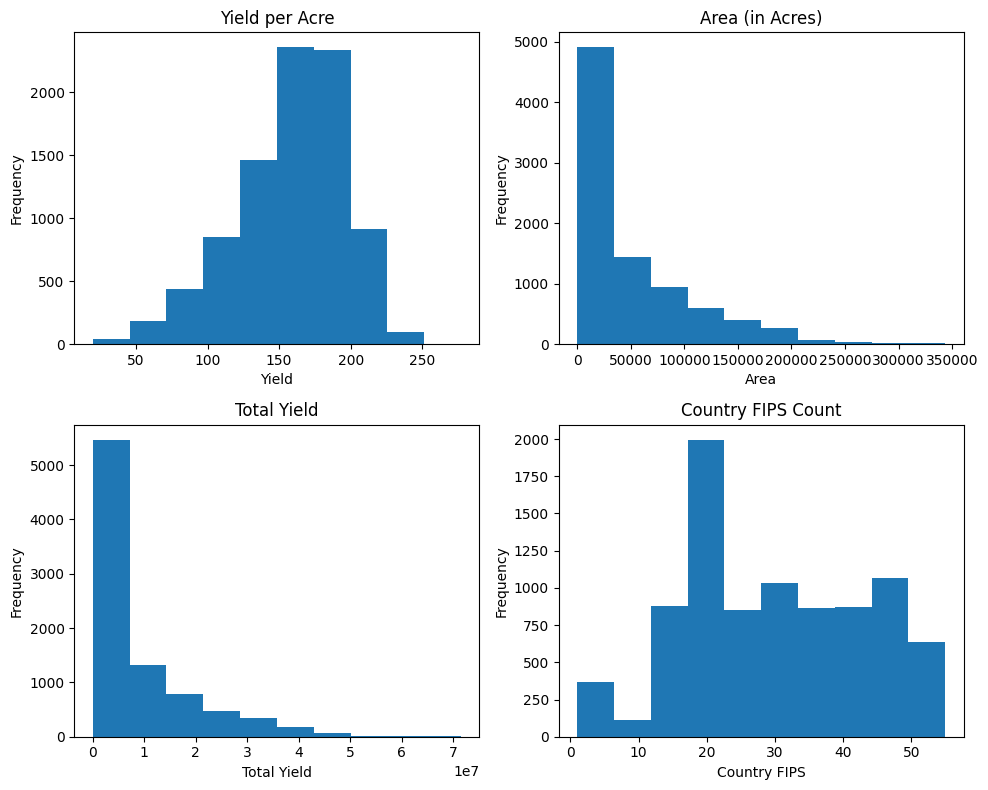

In [3]:
columns_to_include = ['STATE_FIPS', 'COUNTY_FIPS', 'YIELD', 'AREA', 'TOTAL_YIELD']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Yield histogram
axs[0, 0].hist(df['YIELD'])
axs[0, 0].set_title('Yield per Acre')
axs[0, 0].set_xlabel('Yield')
axs[0, 0].set_ylabel('Frequency')

# Area histogram
axs[0, 1].hist(df['AREA'])
axs[0, 1].set_title('Area (in Acres)')
axs[0, 1].set_xlabel('Area')
axs[0, 1].set_ylabel('Frequency')

# Total Yield histogram
axs[1, 0].hist(df['TOTAL_YIELD'])
axs[1, 0].set_title('Total Yield')
axs[1, 0].set_xlabel('Total Yield')
axs[1, 0].set_ylabel('Frequency')

# To hide the fourth subplot (empty)
axs[1, 1].hist(df['STATE_FIPS'])
axs[1, 1].set_title('Country FIPS Count')
axs[1, 1].set_xlabel('Country FIPS')
axs[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

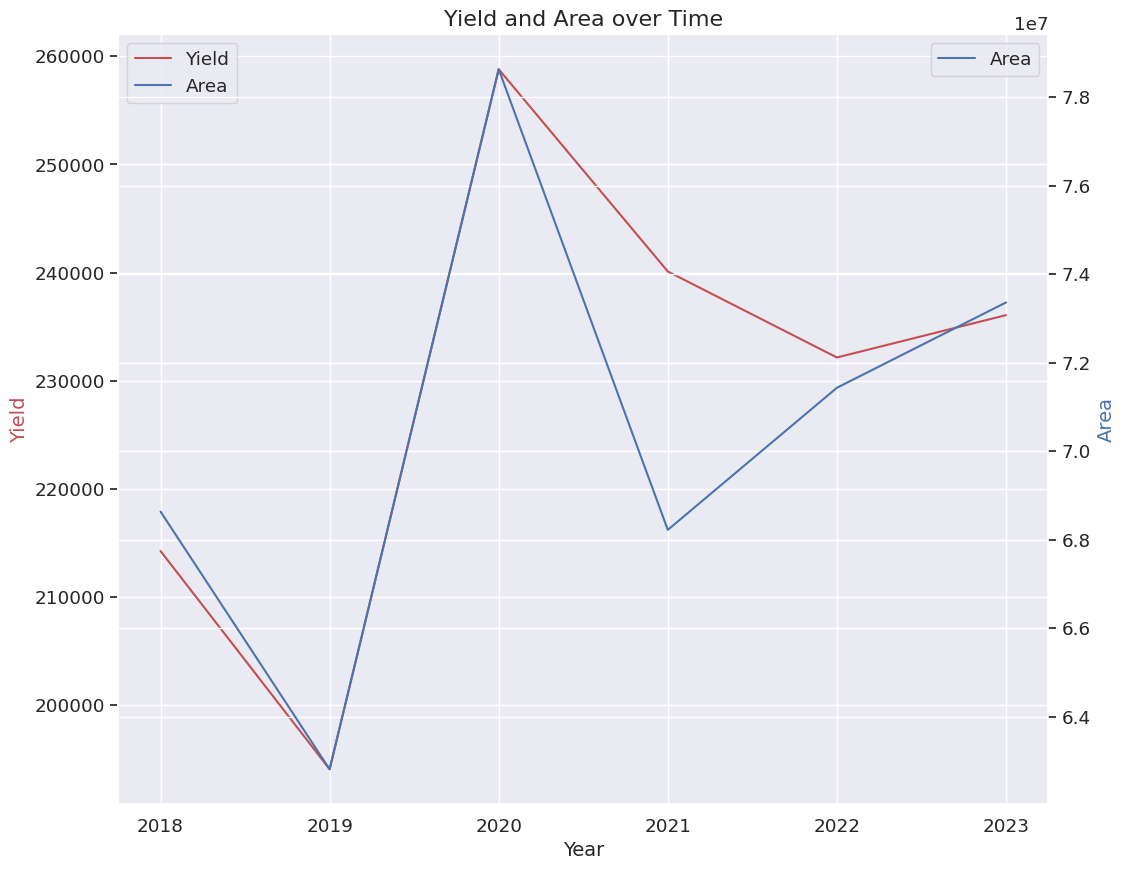

In [5]:
sns.set(font_scale=1.2)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the lines
sns.lineplot(data=df_viz, x='YEAR', y='YIELD', color="r", label="Yield", ax=ax)
ax1 = ax.twinx()
sns.lineplot(data=df_viz, x='YEAR', y='AREA', color="b", ax=ax1, label="Area")

# Set labels and titles
ax.set_ylabel('Yield', color='r', fontsize=14)
ax1.set_ylabel('Area', color='b', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_title('Yield and Area over Time', fontsize=16)

# Set legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Show plot
plt.show()

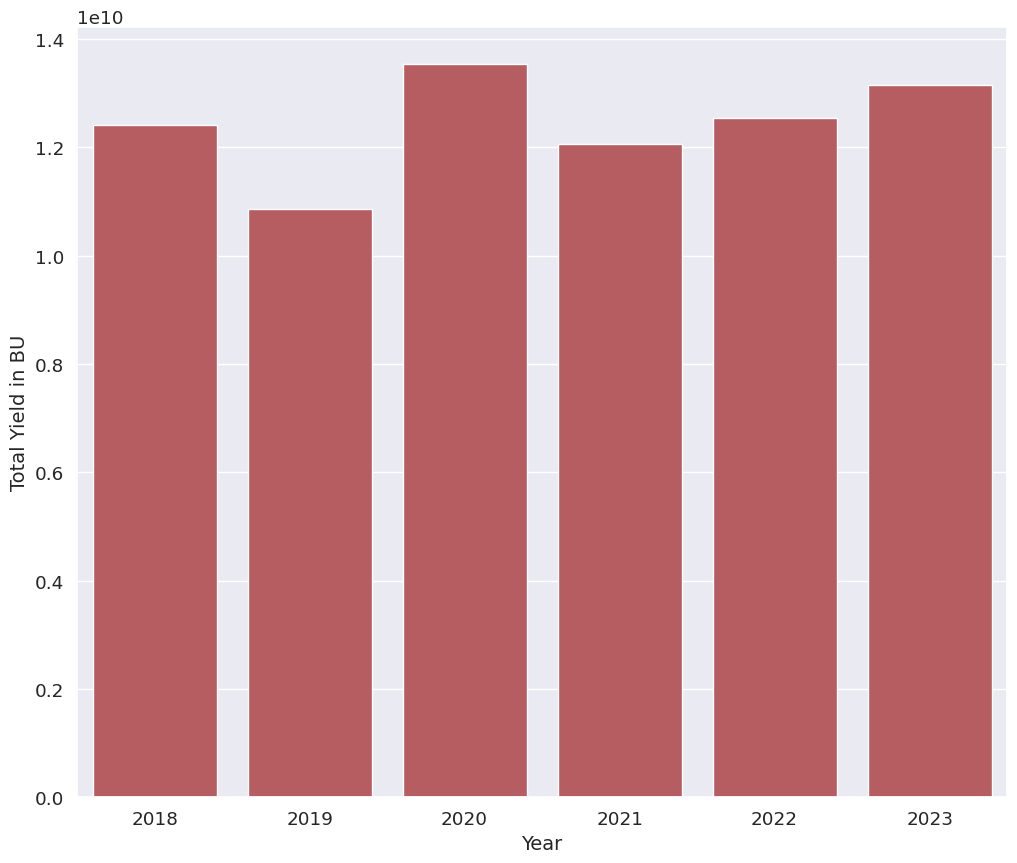

In [6]:
sns.set(font_scale=1.2)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the lines
sns.barplot(data=df_viz, x='YEAR', y='TOTAL_YIELD', color="r", ax=ax)

# Set labels and titles
ax.set_ylabel('Total Yield in BU', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

# Show plot
plt.show()

In [7]:
df_state = df.groupby(by=["STATE_FIPS", "YEAR"])[["YIELD", "AREA", "TOTAL_YIELD"]].sum().reset_index()

# convert fips to state names
fips_to_state = {
    1: 'Alabama',
    2: 'Alaska',
    4: 'Arizona',
    5: 'Arkansas',
    6: 'California',
    8: 'Colorado',
    9: 'Connecticut',
    10: 'Delaware',
    11: 'District of Columbia',
    12: 'Florida',
    13: 'Georgia',
    15: 'Hawaii',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    19: 'Iowa',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    23: 'Maine',
    24: 'Maryland',
    25: 'Massachusetts',
    26: 'Michigan',
    27: 'Minnesota',
    28: 'Mississippi',
    29: 'Missouri',
    30: 'Montana',
    31: 'Nebraska',
    32: 'Nevada',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    36: 'New York',
    37: 'North Carolina',
    38: 'North Dakota',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    50: 'Vermont',
    51: 'Virginia',
    53: 'Washington',
    54: 'West Virginia',
    55: 'Wisconsin',
    56: 'Wyoming'
}

def fips_to_state_name(fips):
    return fips_to_state.get(fips, 'Unknown')  

df_state['STATE'] = df_state['STATE_FIPS'].apply(fips_to_state_name)

df_state.head()

,STATE_FIPS,YEAR,YIELD,AREA,TOTAL_YIELD,STATE
0,1,2018,4129.4,190240,30199788.0,Alabama
1,1,2019,4002.2,218920,33671274.0,Alabama
2,1,2020,5907.9,274740,44067167.0,Alabama
3,1,2021,4418.6,237530,40835854.0,Alabama
4,1,2022,3900.5,241040,28243927.0,Alabama


/home/kaywee/Documents/wee's things/cds-corn-prediction/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


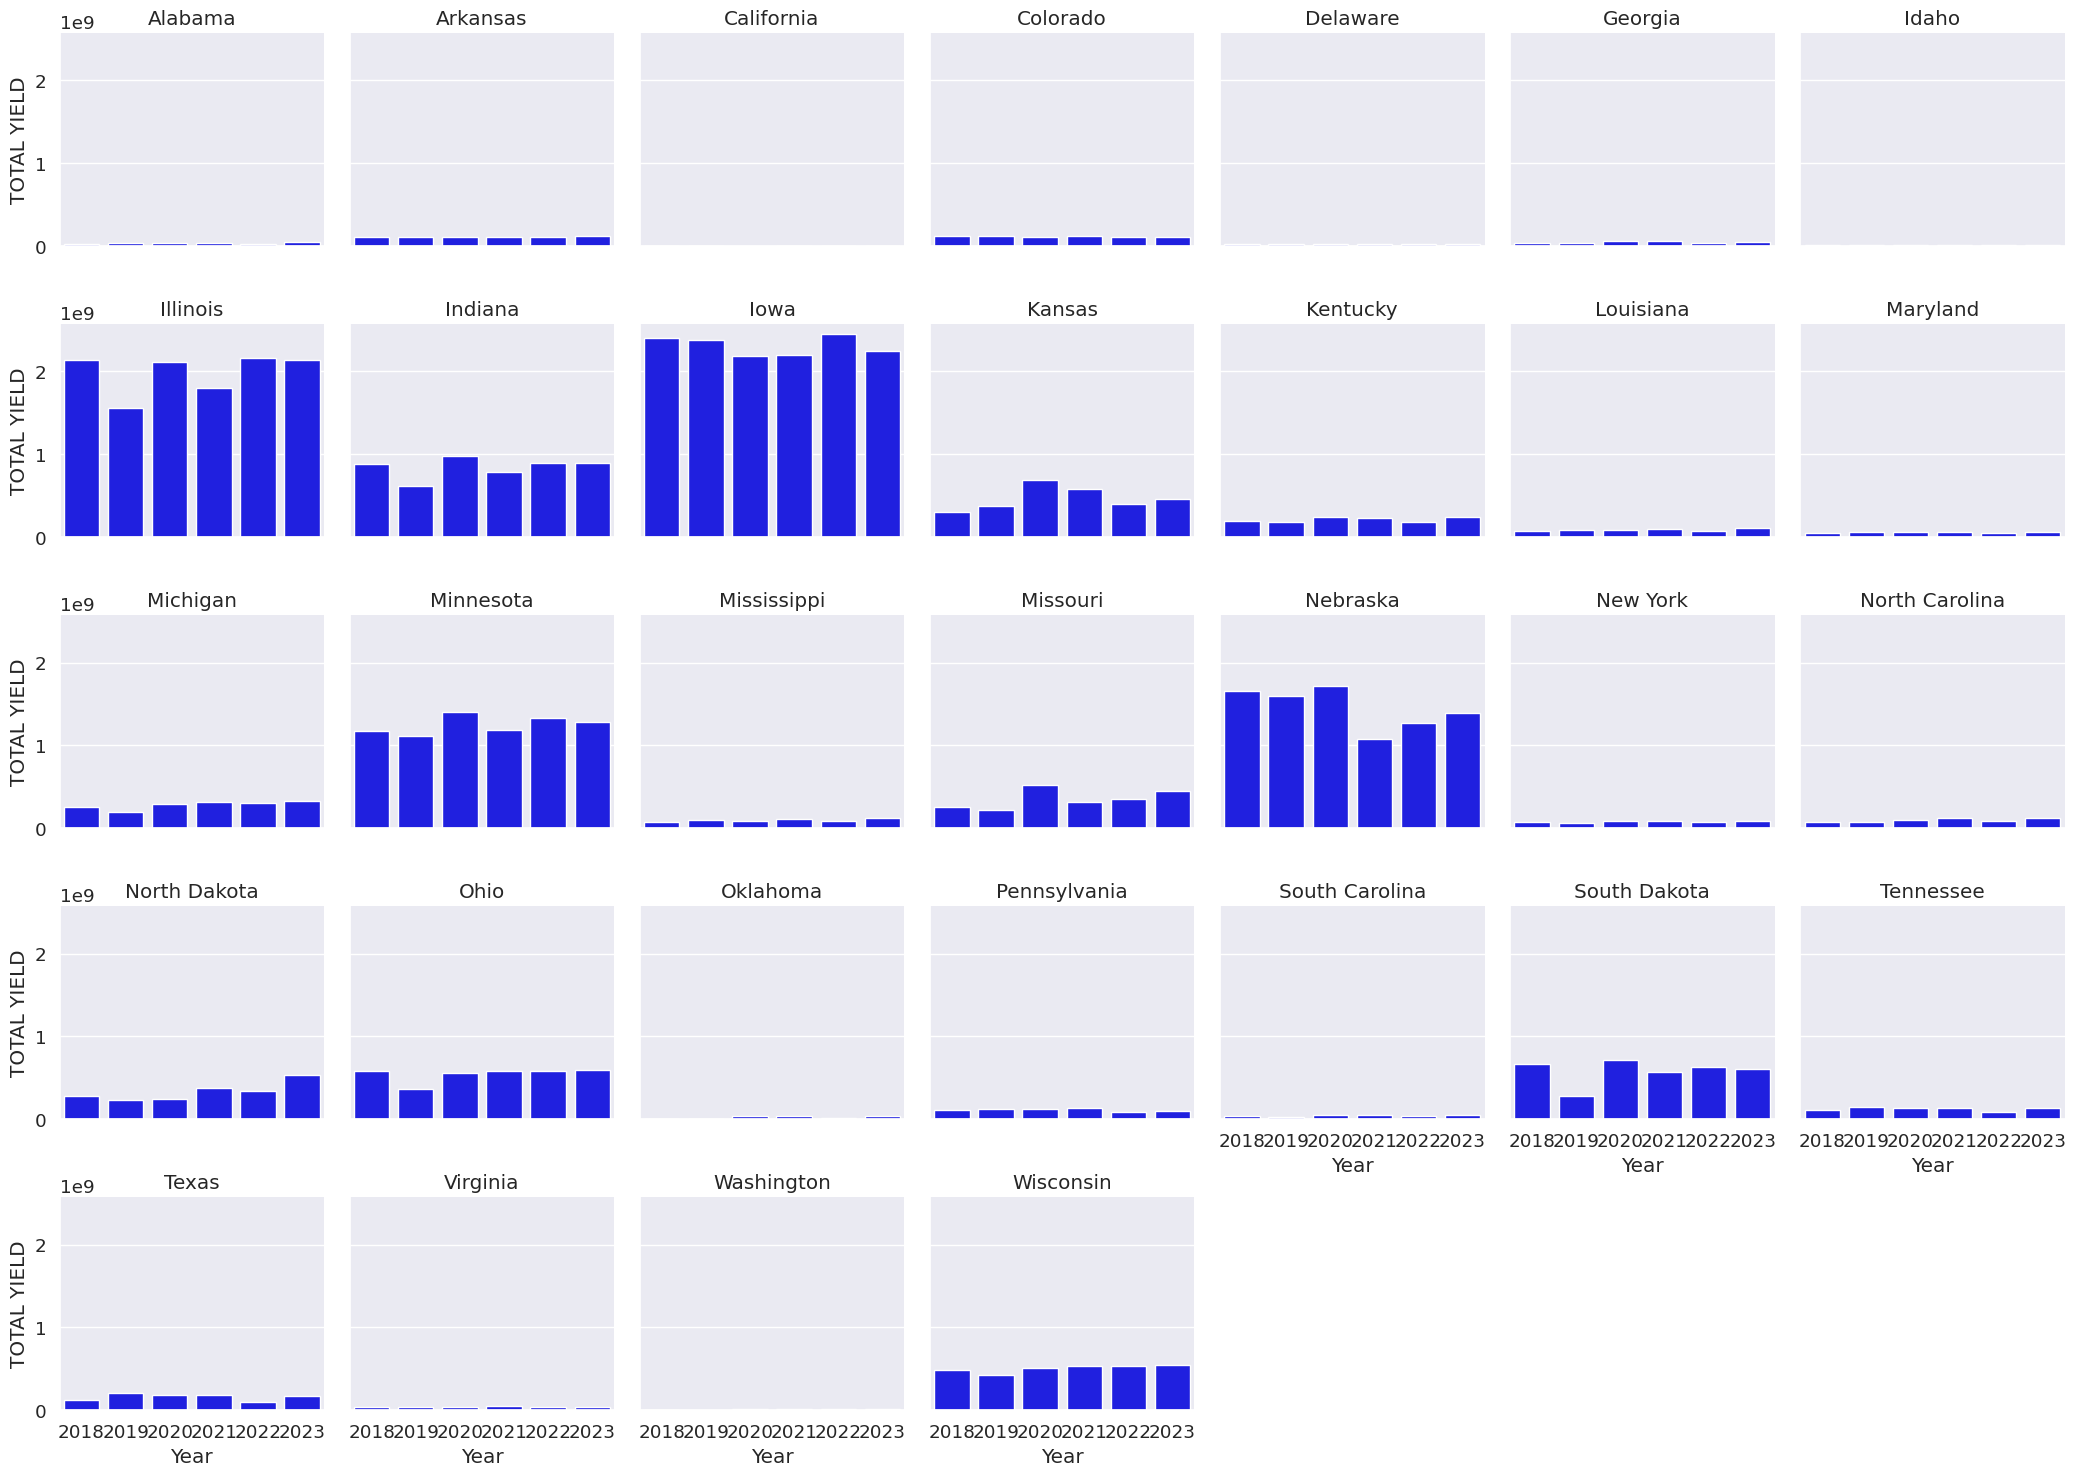

In [8]:
g = sns.FacetGrid(df_state, col="STATE", col_wrap=7, height=3)

# Map plots onto the grid
g.map(sns.barplot, "YEAR", "TOTAL_YIELD", color='blue')

# Add labels and titles
g.set_axis_labels("Year", "TOTAL YIELD")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

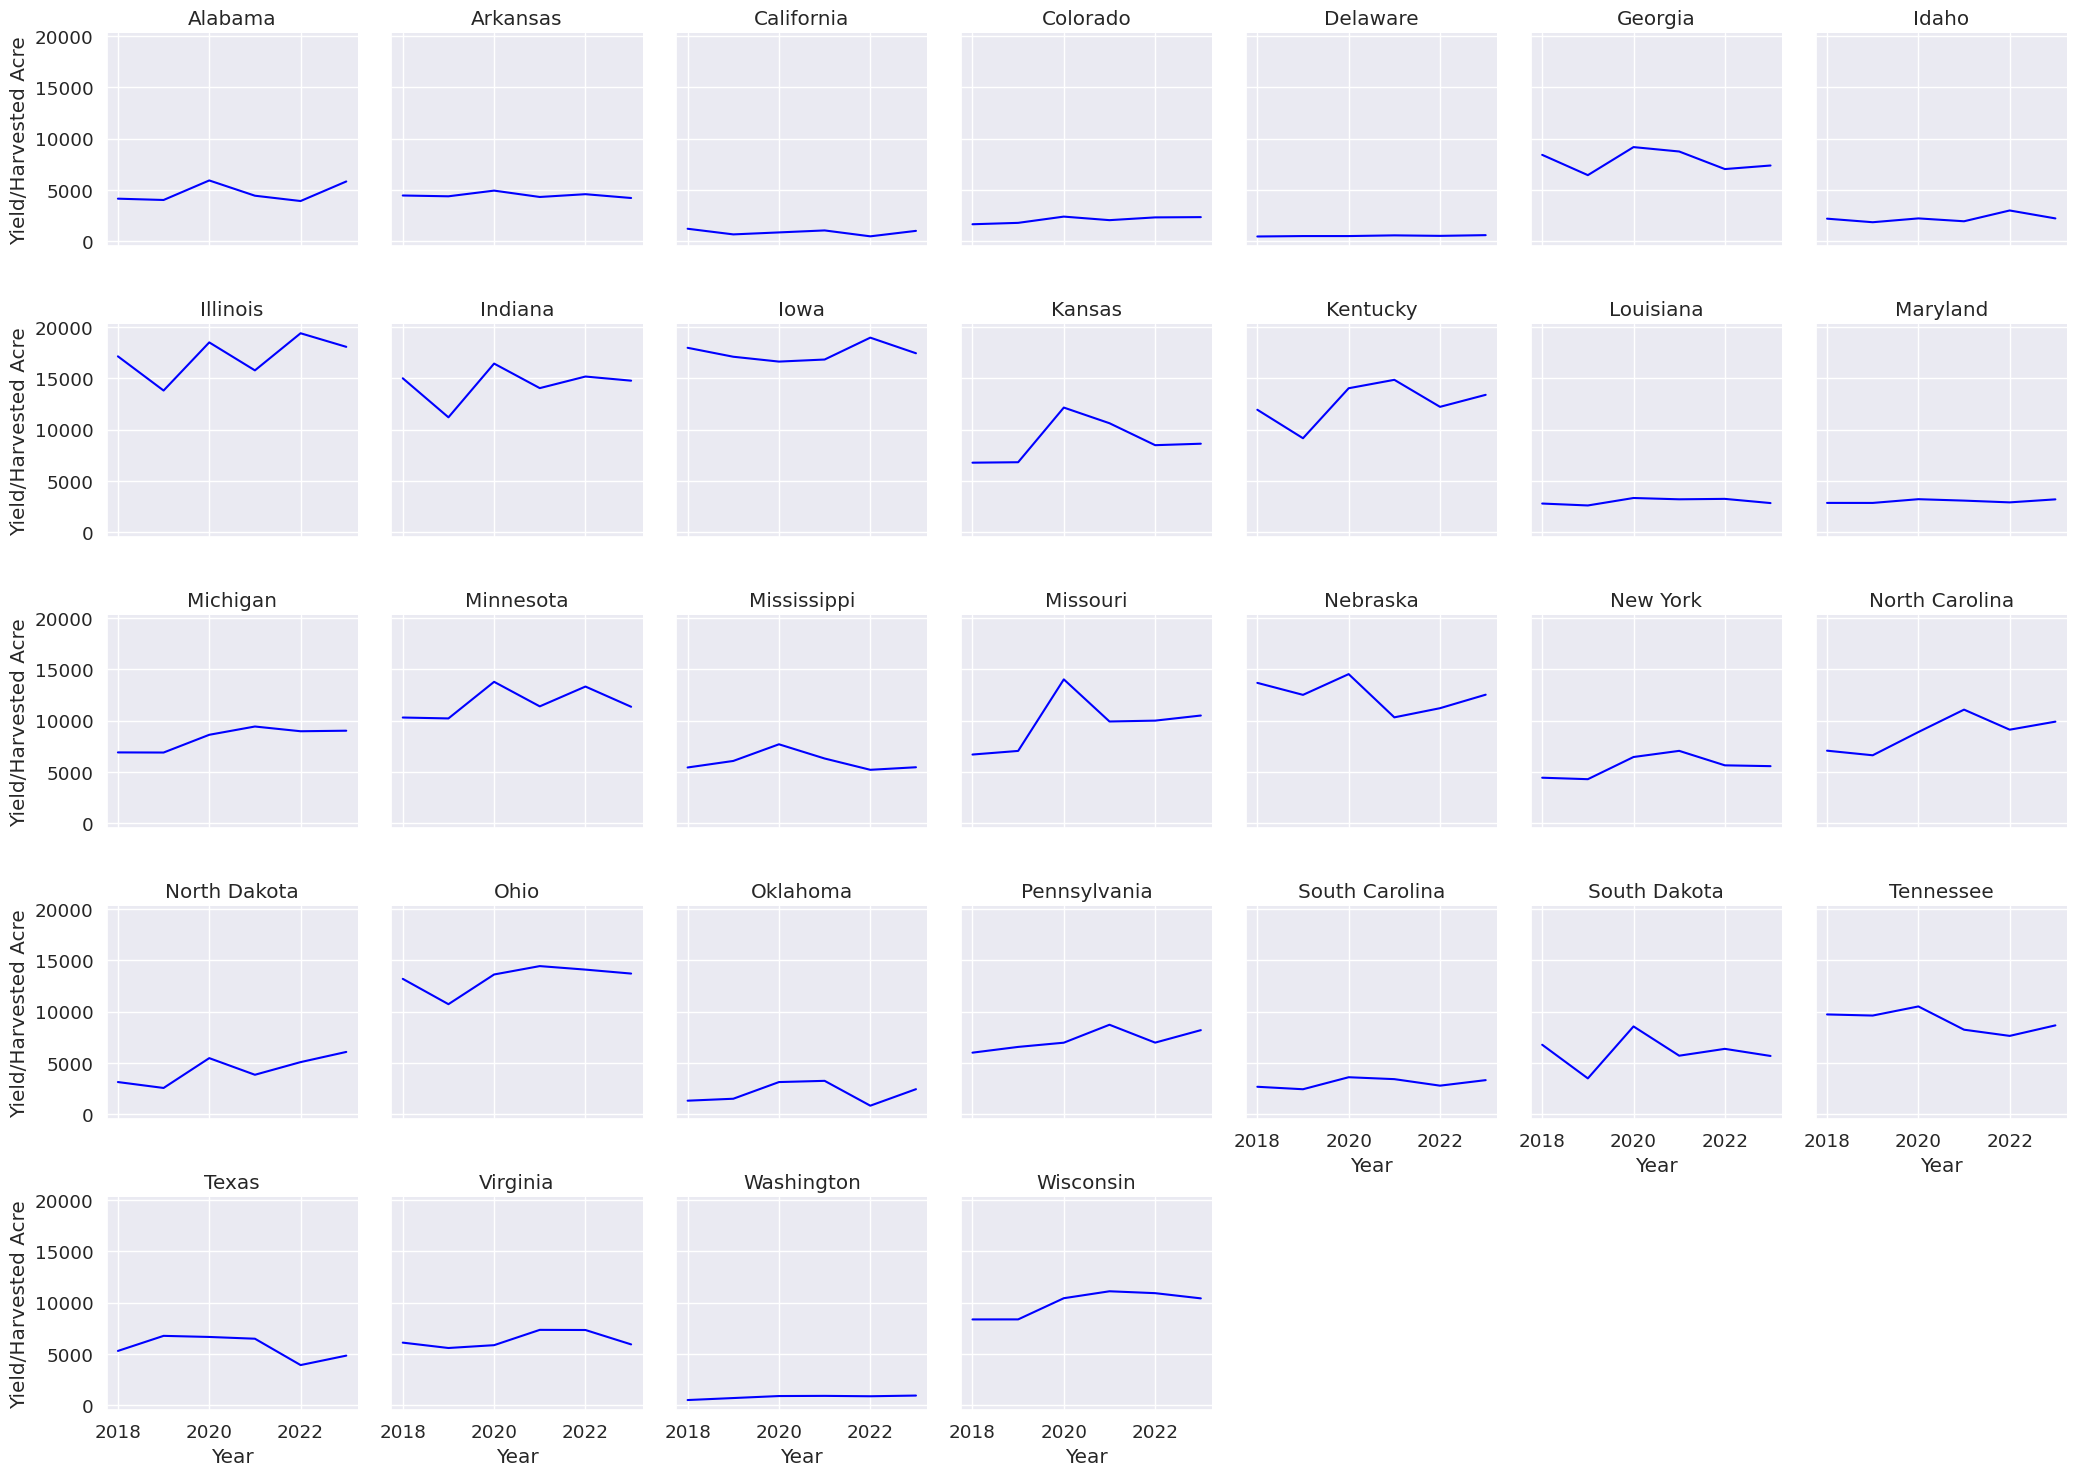

In [9]:
g = sns.FacetGrid(df_state, col="STATE", col_wrap=7, height=3)

# Map plots onto the grid
g.map(sns.lineplot, "YEAR", "YIELD", color='blue')
# g.map(sns.lineplot, "YEAR", "AREA", color='blue')

# Add labels and titles
g.set_axis_labels("Year", "Yield/Harvested Acre")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

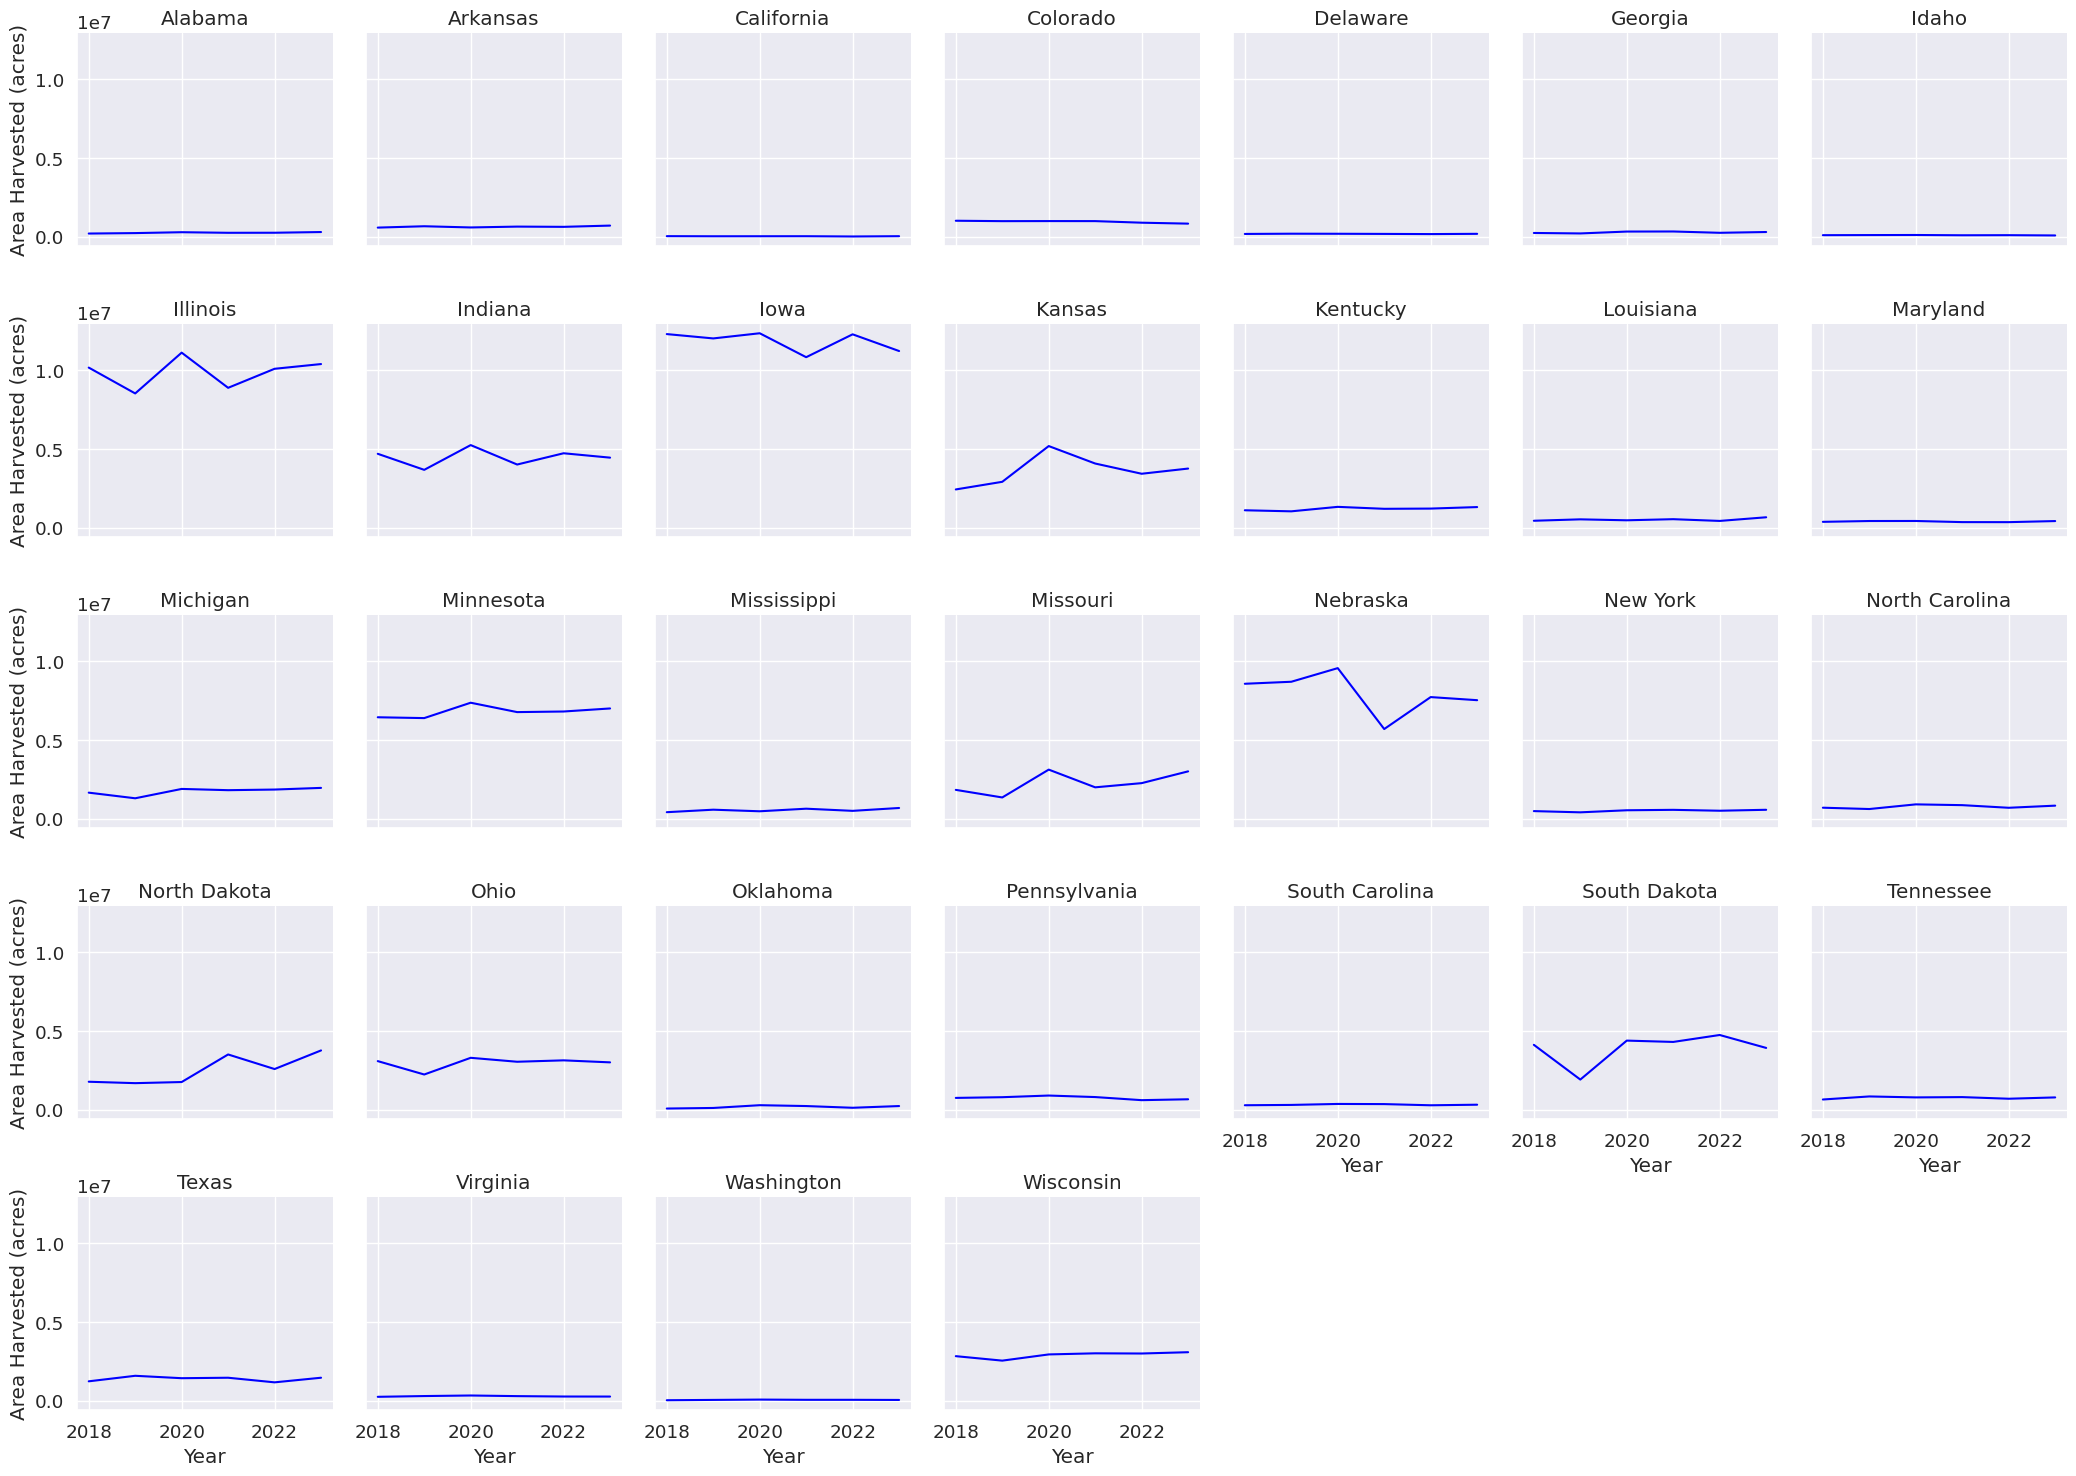

In [10]:
g = sns.FacetGrid(df_state, col="STATE", col_wrap=7, height=3)

# Map plots onto the grid
# g.map(sns.lineplot, "YEAR", "YIELD", color='blue')
g.map(sns.lineplot, "YEAR", "AREA", color='blue')

# Add labels and titles
g.set_axis_labels("Year", "Area Harvested (acres)")
g.set_titles("{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

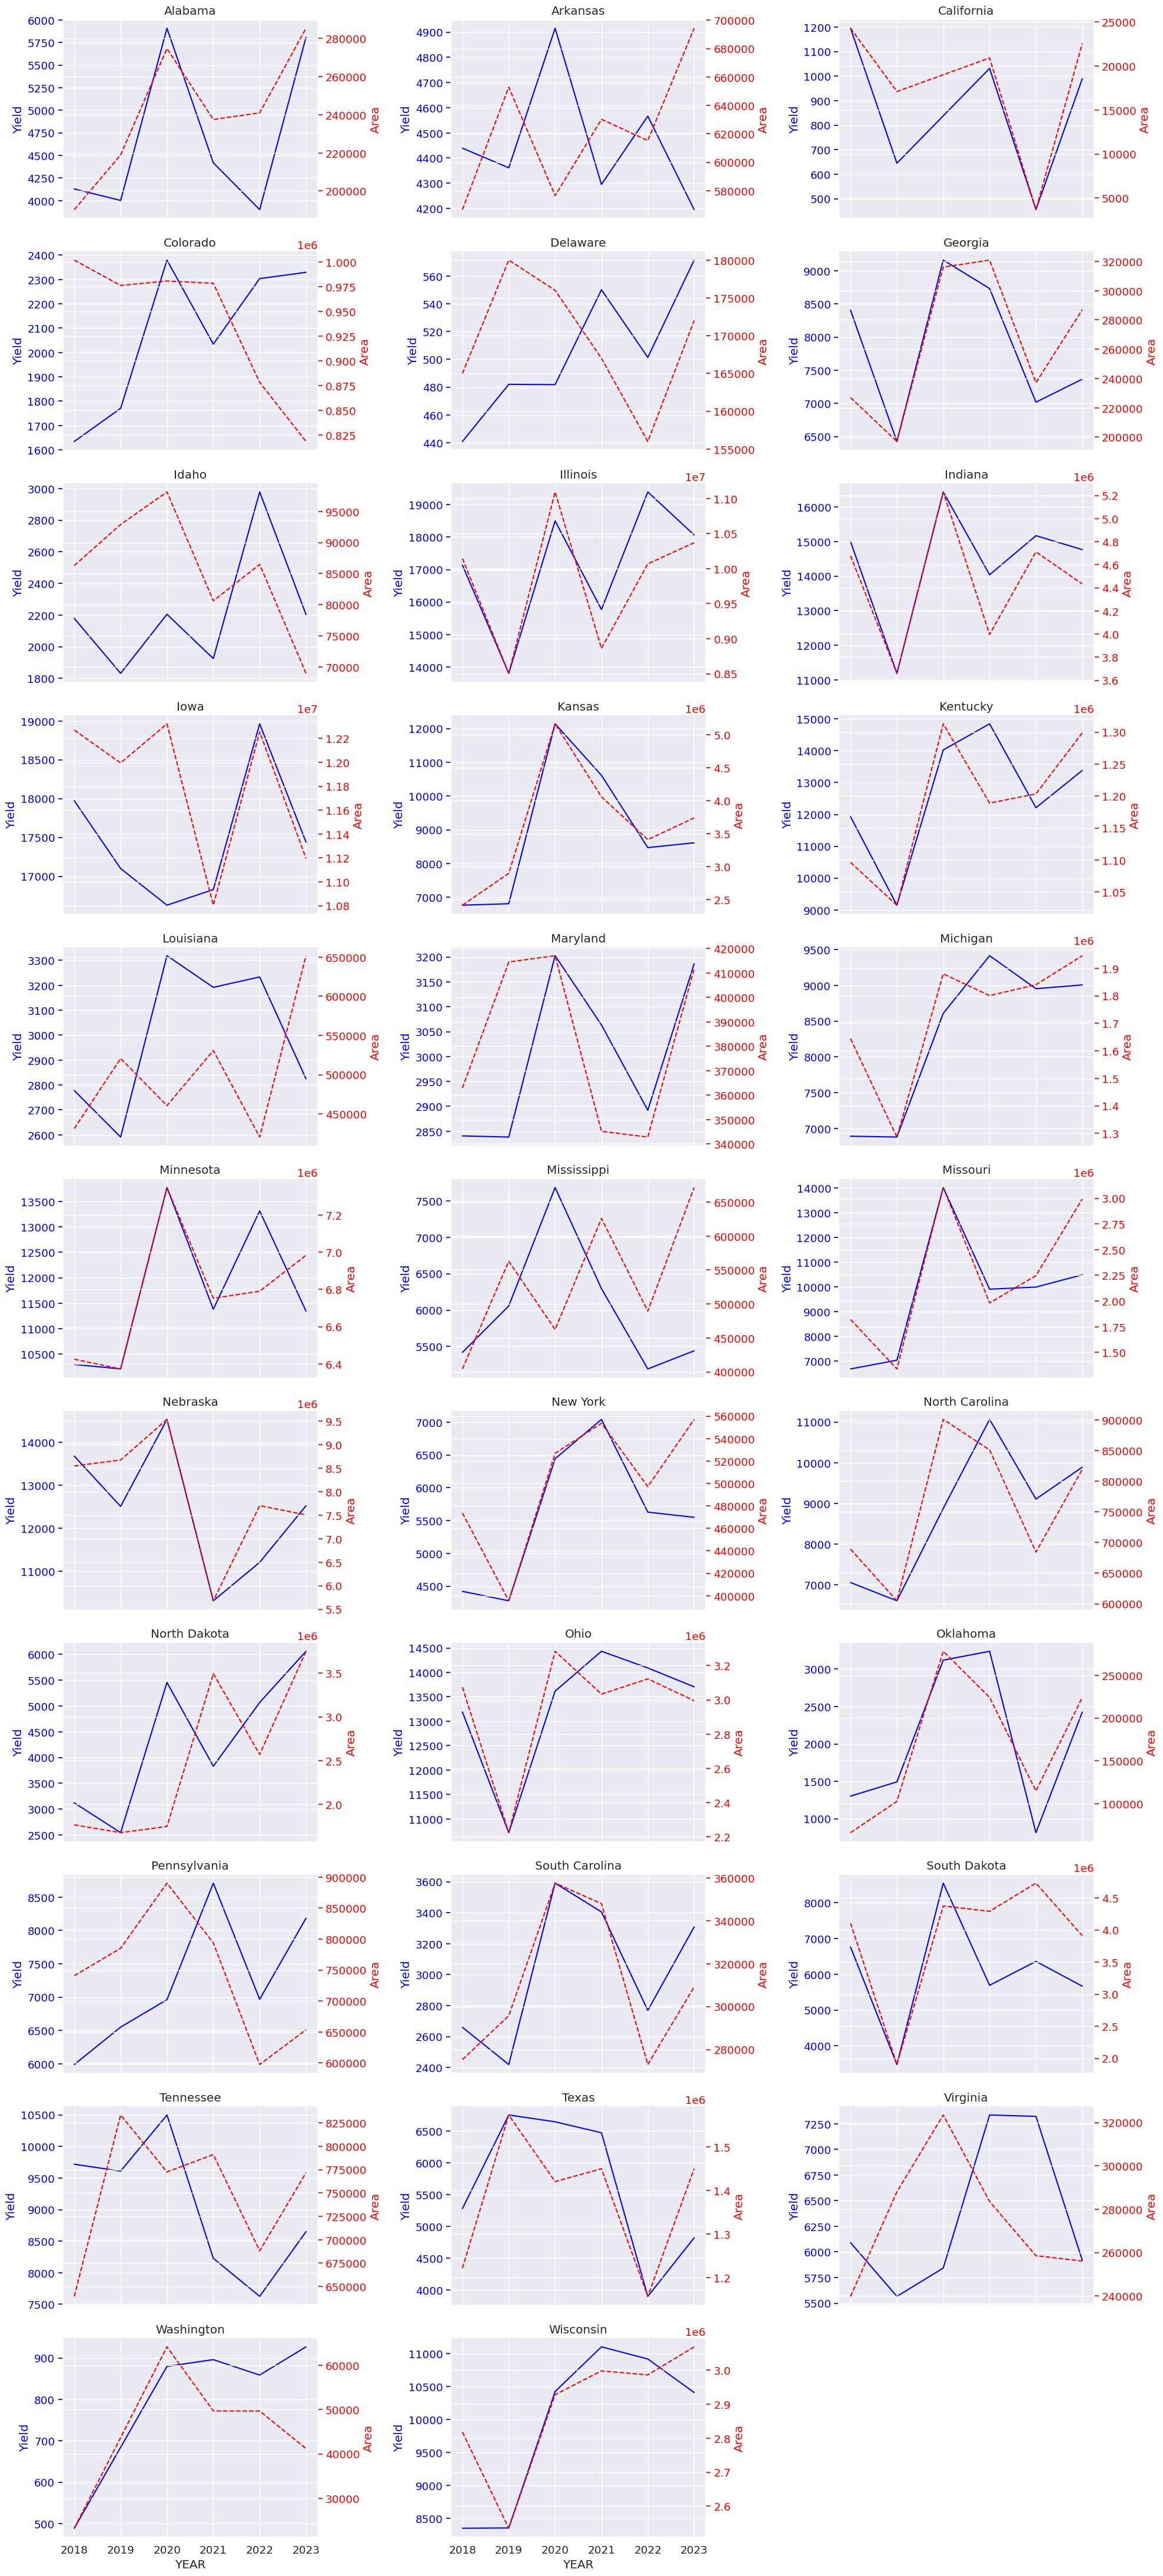

In [11]:
import math

# Determine the number of rows and columns needed for subplots
num_states = len(df_state['STATE'].unique())
num_cols = 3
num_rows = math.ceil(num_states / num_cols)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows), sharex=True)

# Iterate over each state and plot its data
for i, (state, data) in enumerate(df_state.groupby('STATE')):
    ax_row = i // num_cols
    ax_col = i % num_cols
    ax = axes[ax_row, ax_col]
    
    sns.lineplot(data=data, x='YEAR', y='YIELD', ax=ax, color='blue', linestyle='-')
    ax.set_ylabel('Yield', color='blue')
    ax.tick_params(axis='y', colors='blue')
    
    # Create a secondary y-axis for area
    ax2 = ax.twinx()
    sns.lineplot(data=data, x='YEAR', y='AREA', ax=ax2, color='red', linestyle='--')
    ax2.set_ylabel('Area', color='red')
    ax2.tick_params(axis='y', colors='red')
    
    ax.set_title(state)


# Adjust layout
plt.tight_layout()

if num_states % num_cols != 0:
    for i in range(num_states % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, i])
        
# Show the plot
plt.show()